In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetic-retinopathy-detection/train.zip.003
/kaggle/input/diabetic-retinopathy-detection/test.zip.004
/kaggle/input/diabetic-retinopathy-detection/test.zip.005
/kaggle/input/diabetic-retinopathy-detection/train.zip.002
/kaggle/input/diabetic-retinopathy-detection/test.zip.006
/kaggle/input/diabetic-retinopathy-detection/test.zip.003
/kaggle/input/diabetic-retinopathy-detection/train.zip.005
/kaggle/input/diabetic-retinopathy-detection/train.zip.001
/kaggle/input/diabetic-retinopathy-detection/sampleSubmission.csv.zip
/kaggle/input/diabetic-retinopathy-detection/test.zip.007
/kaggle/input/diabetic-retinopathy-detection/trainLabels.csv.zip
/kaggle/input/diabetic-retinopathy-detection/test.zip.001
/kaggle/input/diabetic-retinopathy-detection/sample.zip
/kaggle/input/diabetic-retinopathy-detection/train.zip.004
/kaggle/input/diabetic-retinopathy-detection/test.zip.002
/kaggle/input/prepossessed-arrays-of-binary-data/Binary_images_data_128.npz
/kaggle/input/prepossessed-array

In [2]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
from sklearn.neural_network import MLPClassifier
# import pydot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

from sklearn.metrics import confusion_matrix

print("All modules have been imported")

All modules have been imported


In [3]:
info=pd.read_csv("../input/prepossessed-arrays-of-binary-data/1000_Binary Dataframe")
info=info.drop('Unnamed: 0',axis=1)
info.head()

,exists,eye_side,level,path,patient_id,level_cat
0,True,left,0,../input/diabetic-retinopathy-detection/10_lef...,10,[1. 0.]
1,True,right,0,../input/diabetic-retinopathy-detection/10_rig...,10,[1. 0.]
2,True,left,0,../input/diabetic-retinopathy-detection/13_lef...,13,[1. 0.]
3,True,right,0,../input/diabetic-retinopathy-detection/13_rig...,13,[1. 0.]
4,True,left,0,../input/diabetic-retinopathy-detection/17_lef...,17,[1. 0.]


In [4]:
info.level.value_counts()

0    739
1    261
Name: level, dtype: int64

<AxesSubplot:ylabel='level'>

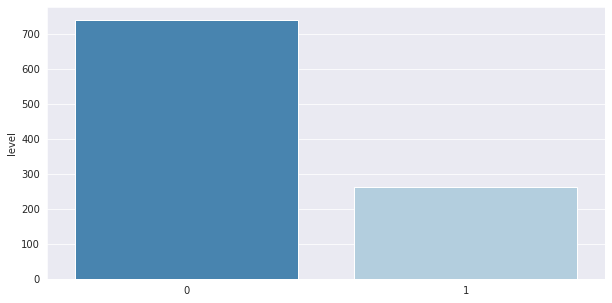

In [5]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=info.level.unique(),y=info.level.value_counts(),palette='Blues_r',ax=ax)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

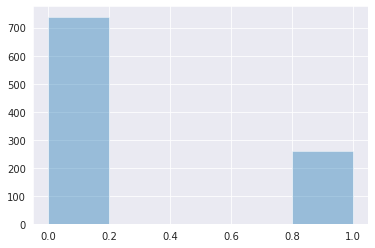

In [6]:
sizes = info['level'].values
sns.distplot(sizes, kde=False)

In [7]:
Binary_90 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_90.npz')
X_90=Binary_90['a']
Binary_128 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_128.npz')
X_128=Binary_128['a']
Binary_264 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_264.npz')
X_264=Binary_264['a']
y=info['level'].values


print(X_90.shape)
print(X_128.shape)
print(X_264.shape)
print(y.shape)

(1000, 24300)
(1000, 49152)
(1000, 209088)
(1000,)


In [8]:
print("Shape before reshaping X_90" +str(X_90.shape))
X_90=X_90.reshape(1000,90,90,3)
print("Shape after reshaping X_90" +str(X_90.shape))
print("\n\n")

print("Shape before reshaping X_128" +str(X_128.shape))
X_128=X_128.reshape(1000,128,128,3)
print("Shape after reshaping X_128" +str(X_128.shape))
print("\n\n")

print("Shape before reshaping X_264" +str(X_264.shape))
X_264=X_264.reshape(1000,264,264,3)
print("Shape after reshaping X_264" +str(X_264.shape))

Shape before reshaping X_90(1000, 24300)
Shape after reshaping X_90(1000, 90, 90, 3)



Shape before reshaping X_128(1000, 49152)
Shape after reshaping X_128(1000, 128, 128, 3)



Shape before reshaping X_264(1000, 209088)
Shape after reshaping X_264(1000, 264, 264, 3)


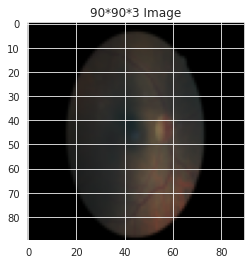

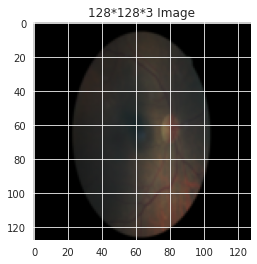

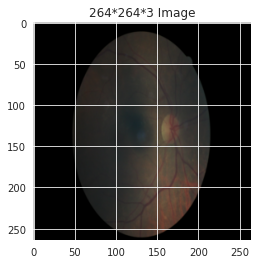

In [9]:
plt.title("90*90*3 Image")
plt.imshow(X_90[1])
plt.show()

plt.title("128*128*3 Image")
plt.imshow(X_128[1])
plt.show()

plt.title("264*264*3 Image")
plt.imshow(X_264[1])
plt.show()

In [10]:
y.shape

(1000,)

In [11]:
X=np.array(X_264)
Y=np.array(y)
# Y=to_categorical(Y,5)
x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)
print(len(x_train),len(x_val),len(x_test))

600 200 200


In [12]:
Y1=pd.DataFrame(Y)
Y1.value_counts()

0    739
1    261
dtype: int64

In [13]:
dnn_model=Sequential()
dnn_model.add(Dense(8, input_dim=3, kernel_initializer = 'uniform', activation = 'relu'))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu'))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(256, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(3,activation='softmax'))
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 32        
_________________________________________________________________
batch_normalization (BatchNo (None, 8)                 32        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                5

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)

In [15]:
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    y_pred_train = [1 if x>0.5 else 0 for x in y_pred_train]
    y_pred_val = [1 if x>0.5 else 0 for x in y_pred_val]
    y_pred_test = [1 if x>0.5 else 0 for x in y_pred_test]
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy)) 
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
                          
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
          
    print("-"*80)
    print()

In [16]:
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [17]:
base_model= ResNet50(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

94781440/94765736 [==============================] - 0s 0us/step


In [18]:
from sklearn.pipeline import make_pipeline
from sklearn import pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
    
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
   
    print('------------------------ Test Set Metrics------------------------')
    print("Accuracy score : {}%".format(test_accuracy))
    
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [19]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 77.5%
------------------------ Validation Set Metrics------------------------

Accuracy score : 65.5%
------------------------ Test Set Metrics------------------------
Accuracy score : 74.0%

Accuracy score : 74.0%
F1_score : 0.69
Kappa Score : -0.01 
Recall score: 0.74
Precision score : 0.66
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------
Accuracy score : 78.5%

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



------------------------ Train Set Metrics------------------------

Accuracy core : 80.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 70.0%
------------------------ Test Set Metrics------------------------
Accuracy score : 76.5%

Accuracy score : 76.5%
F1_score : 0.68
Kappa Score : -0.04 
Recall score: 0.76
Precision score : 0.61
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 76.17%
------------------------ Validation Set Metrics------------------------

Accuracy score : 68.0%
------------------------ Test Set Metrics------------------------
Accuracy score : 74.5%

Accuracy score : 74.5%
F1_score : 0.7
Kappa Score : 0.04 
Recall score: 0.74
Precision score : 0.68
-------------------------------------------------------

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



------------------------ Train Set Metrics------------------------

Accuracy core : 99.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 66.0%
------------------------ Test Set Metrics------------------------
Accuracy score : 70.5%

Accuracy score : 70.5%
F1_score : 0.69
Kappa Score : 0.04 
Recall score: 0.7
Precision score : 0.68
--------------------------------------------------------------------------------

------------------------------Fitting MLP Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------
Accuracy score : 78.5%

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
---------------------------------------------------------------

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 3s 32ms/step - loss: 1.3867 - accuracy: 0.2017 - val_loss: 1.0716 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 0s 11ms/step - loss: 1.2520 - accuracy: 0.2400 - val_loss: 1.0466 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 1.1473 - accuracy: 0.2850 - val_loss: 1.0213 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 0s 12ms/step - loss: 1.0811 - accuracy: 0.3633 - val_loss: 0.9965 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 0s 11ms/step - loss: 1.0809 - accuracy: 0.4067 - val_loss: 0.9723 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 1.0145 - accuracy: 0.4850 - val_loss: 0.9487 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.9934 - accuracy: 0.5250 - val_loss: 0.9263 - val_accuracy: 0.7300
Epoch 8/10
19

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


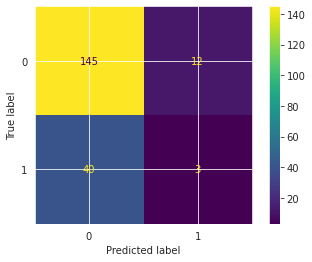

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


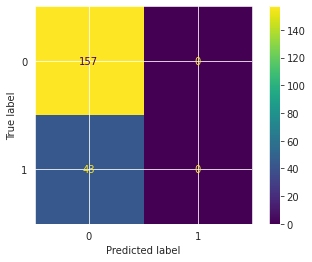

In [22]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


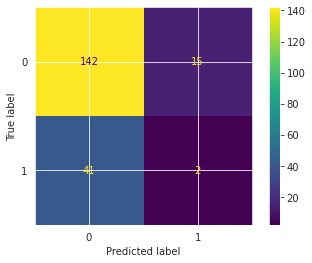

In [23]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


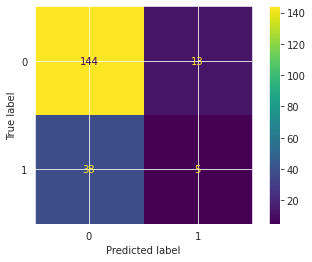

In [24]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:36:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


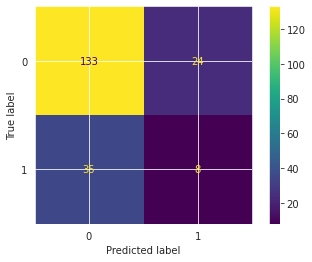

In [25]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


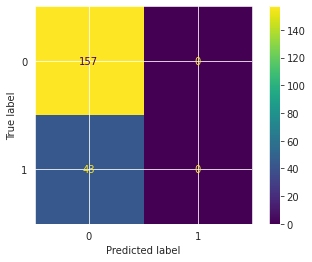

In [26]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)

In [27]:
base_model= VGG16(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

58900480/58889256 [==============================] - 0s 0us/step


In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [29]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 78.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 67.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 70.5%
F1_score : 0.68
Kappa Score : 0.02 
Recall score: 0.7
Precision score : 0.67
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
----

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



------------------------ Train Set Metrics------------------------

Accuracy core : 81.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 74.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 76.5%
F1_score : 0.68
Kappa Score : -0.04 
Recall score: 0.76
Precision score : 0.61
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 75.83%
------------------------ Validation Set Metrics------------------------

Accuracy score : 69.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 75.0%
F1_score : 0.69
Kappa Score : -0.01 
Recall score: 0.75
Precision score : 0.65
--------------------------------------------------------------------------------

------------------

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



------------------------ Train Set Metrics------------------------

Accuracy core : 99.5%
------------------------ Validation Set Metrics------------------------

Accuracy score : 63.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 66.5%
F1_score : 0.65
Kappa Score : -0.07 
Recall score: 0.66
Precision score : 0.64
--------------------------------------------------------------------------------

------------------------------Fitting MLP Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--------------------------------------------------------------------------------



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'],)
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 3s 30ms/step - loss: 0.8775 - accuracy: 0.6233 - val_loss: 0.8106 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 0s 9ms/step - loss: 0.8544 - accuracy: 0.6283 - val_loss: 0.7816 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 0.8156 - accuracy: 0.6883 - val_loss: 0.7547 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.7896 - accuracy: 0.6817 - val_loss: 0.7301 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.7677 - accuracy: 0.7050 - val_loss: 0.7104 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 0.7470 - accuracy: 0.6983 - val_loss: 0.6968 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.7485 - accuracy: 0.6983 - val_loss: 0.6837 - val_accuracy: 0.7300
Epoch 8/10
19/1

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


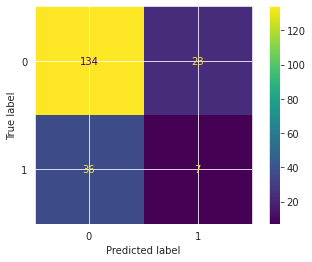

In [31]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


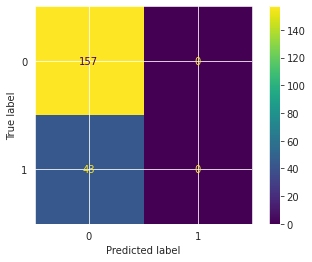

In [32]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


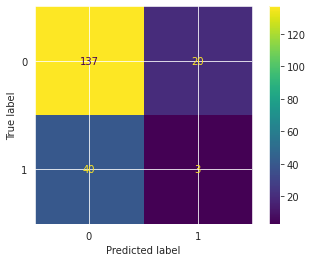

In [33]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


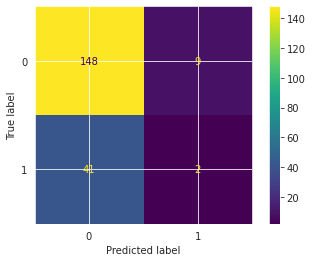

In [34]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:42:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


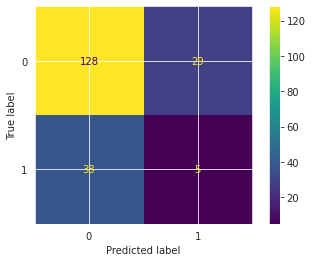

In [35]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


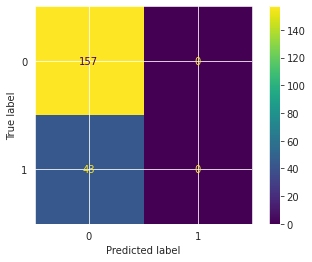

In [36]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)

In [37]:
base_model= VGG19(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

80150528/80134624 [==============================] - 0s 0us/step


In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [39]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 77.83%
------------------------ Validation Set Metrics------------------------

Accuracy score : 68.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 72.0%
F1_score : 0.69
Kappa Score : 0.04 
Recall score: 0.72
Precision score : 0.68
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



------------------------ Train Set Metrics------------------------

Accuracy core : 81.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 72.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 77.5%
F1_score : 0.7
Kappa Score : 0.03 
Recall score: 0.78
Precision score : 0.69
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 76.83%
------------------------ Validation Set Metrics------------------------

Accuracy score : 71.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 77.5%
F1_score : 0.72
Kappa Score : 0.1 
Recall score: 0.78
Precision score : 0.72
--------------------------------------------------------------------------------

----------------------

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



------------------------ Train Set Metrics------------------------

Accuracy core : 99.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 70.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 63.0%
F1_score : 0.63
Kappa Score : -0.1 
Recall score: 0.63
Precision score : 0.63
--------------------------------------------------------------------------------

------------------------------Fitting MLP Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--------------------------------------------------------------------------------



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 3s 29ms/step - loss: 0.6927 - accuracy: 0.7183 - val_loss: 0.6487 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6726 - accuracy: 0.7250 - val_loss: 0.6450 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6634 - accuracy: 0.7283 - val_loss: 0.6434 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6721 - accuracy: 0.7233 - val_loss: 0.6409 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6516 - accuracy: 0.7233 - val_loss: 0.6289 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6528 - accuracy: 0.7200 - val_loss: 0.6246 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6470 - accuracy: 0.7233 - val_loss: 0.6197 - val_accuracy: 0.7300
Epoch 8/10
19

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


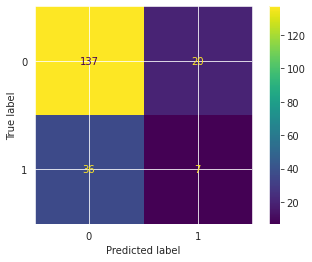

In [41]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


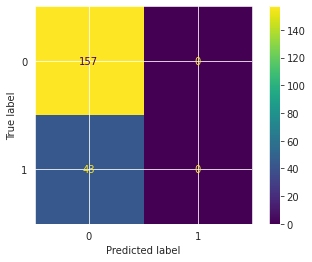

In [42]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


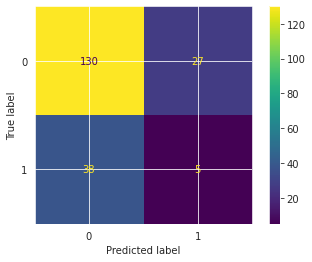

In [43]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


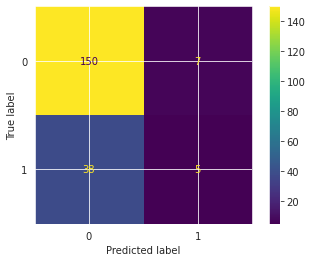

In [44]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:49:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


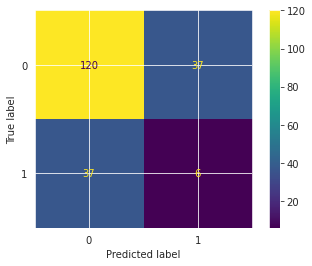

In [45]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


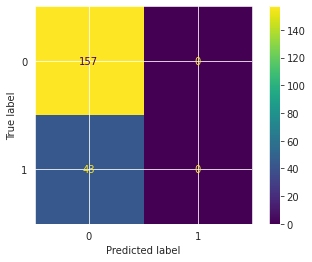

In [46]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)

In [47]:
base_model= ResNet101(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

171458560/171446536 [==============================] - 1s 0us/step


In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [49]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 77.17%
------------------------ Validation Set Metrics------------------------

Accuracy score : 67.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 74.0%
F1_score : 0.69
Kappa Score : -0.01 
Recall score: 0.74
Precision score : 0.66
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
-

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



------------------------ Train Set Metrics------------------------

Accuracy core : 78.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 74.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.0%
F1_score : 0.69
Kappa Score : -0.01 
Recall score: 0.78
Precision score : 0.62
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 76.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 74.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 74.5%
F1_score : 0.67
Kappa Score : -0.07 
Recall score: 0.74
Precision score : 0.61
--------------------------------------------------------------------------------

------------------

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



------------------------ Train Set Metrics------------------------

Accuracy core : 99.33%
------------------------ Validation Set Metrics------------------------

Accuracy score : 63.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 70.0%
F1_score : 0.68
Kappa Score : 0.03 
Recall score: 0.7
Precision score : 0.67
--------------------------------------------------------------------------------

------------------------------Fitting MLP Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--------------------------------------------------------------------------------



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 3s 30ms/step - loss: 0.6347 - accuracy: 0.7217 - val_loss: 0.5895 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6237 - accuracy: 0.7250 - val_loss: 0.5866 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 0.6377 - accuracy: 0.7267 - val_loss: 0.5950 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6168 - accuracy: 0.7250 - val_loss: 0.5997 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 0s 11ms/step - loss: 0.6131 - accuracy: 0.7267 - val_loss: 0.5976 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 11ms/step - loss: 0.6092 - accuracy: 0.7233 - val_loss: 0.5966 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6169 - accuracy: 0.7250 - val_loss: 0.5964 - val_accuracy: 0.7300
Epoch 8/10
19

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


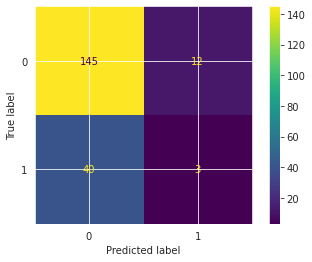

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


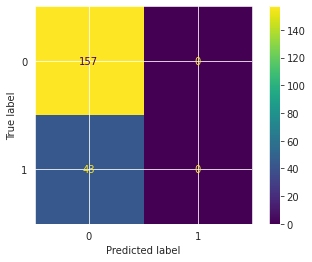

In [52]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


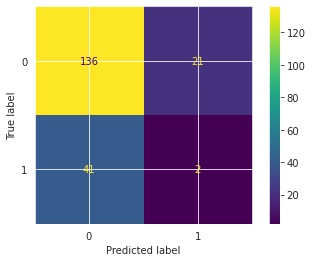

In [53]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


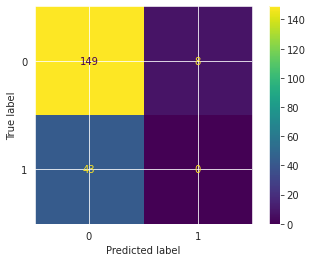

In [54]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:52:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


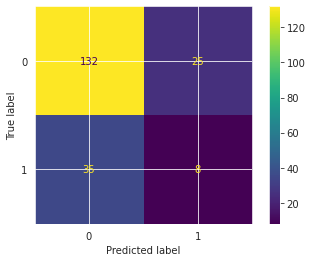

In [55]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


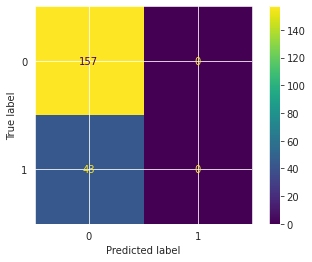

In [56]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)

In [57]:
base_model= MobileNetV2(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

9420800/9406464 [==============================] - 0s 0us/step


In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [59]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 77.17%
------------------------ Validation Set Metrics------------------------

Accuracy score : 66.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 70.5%
F1_score : 0.67
Kappa Score : -0.04 
Recall score: 0.7
Precision score : 0.65
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



------------------------ Train Set Metrics------------------------

Accuracy core : 80.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 72.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 74.0%
F1_score : 0.67
Kappa Score : -0.06 
Recall score: 0.74
Precision score : 0.63
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 74.83%
------------------------ Validation Set Metrics------------------------

Accuracy score : 72.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 76.5%
F1_score : 0.69
Kappa Score : -0.01 
Recall score: 0.76
Precision score : 0.65
--------------------------------------------------------------------------------

------------------

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



------------------------ Train Set Metrics------------------------

Accuracy core : 99.33%
------------------------ Validation Set Metrics------------------------

Accuracy score : 61.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 72.0%
F1_score : 0.71
Kappa Score : 0.11 
Recall score: 0.72
Precision score : 0.7
--------------------------------------------------------------------------------

------------------------------Fitting MLP Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--------------------------------------------------------------------------------



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 3s 30ms/step - loss: 0.6066 - accuracy: 0.7267 - val_loss: 0.6890 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6052 - accuracy: 0.7250 - val_loss: 0.8871 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6103 - accuracy: 0.7267 - val_loss: 0.7238 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6063 - accuracy: 0.7250 - val_loss: 0.6231 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6032 - accuracy: 0.7250 - val_loss: 0.6058 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6008 - accuracy: 0.7267 - val_loss: 0.5855 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5961 - accuracy: 0.7267 - val_loss: 0.5854 - val_accuracy: 0.7300
Epoch 8/10
19

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


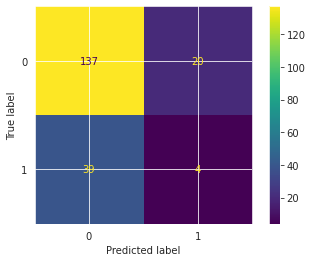

In [61]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


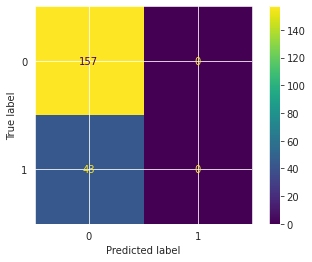

In [62]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


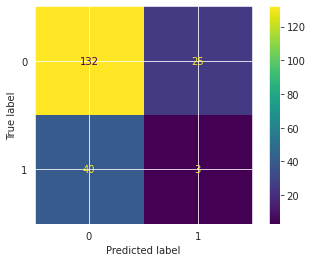

In [63]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


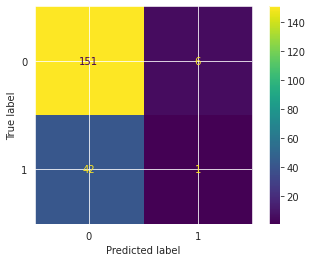

In [64]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:52:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


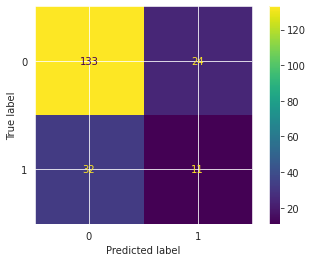

In [65]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


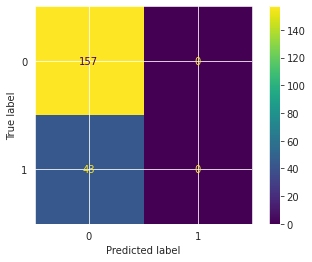

In [66]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)

In [67]:
base_model= MobileNet(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

17235968/17225924 [==============================] - 0s 0us/step


In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [69]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 74.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 65.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 72.5%
F1_score : 0.69
Kappa Score : 0.03 
Recall score: 0.72
Precision score : 0.67
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



------------------------ Train Set Metrics------------------------

Accuracy core : 78.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 76.0%
F1_score : 0.71
Kappa Score : 0.05 
Recall score: 0.76
Precision score : 0.69
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 76.17%
------------------------ Validation Set Metrics------------------------

Accuracy score : 71.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.0%
F1_score : 0.72
Kappa Score : 0.09 
Recall score: 0.78
Precision score : 0.72
--------------------------------------------------------------------------------

--------------------

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



------------------------ Train Set Metrics------------------------

Accuracy core : 98.83%
------------------------ Validation Set Metrics------------------------

Accuracy score : 65.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 72.5%
F1_score : 0.7
Kappa Score : 0.07 
Recall score: 0.72
Precision score : 0.69
--------------------------------------------------------------------------------

------------------------------Fitting MLP Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--------------------------------------------------------------------------------



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 3s 30ms/step - loss: 0.5960 - accuracy: 0.7233 - val_loss: 1.0148 - val_accuracy: 0.4400
Epoch 2/10
19/19 [==============================] - 0s 11ms/step - loss: 0.5938 - accuracy: 0.7283 - val_loss: 0.8200 - val_accuracy: 0.5350
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5956 - accuracy: 0.7283 - val_loss: 0.6940 - val_accuracy: 0.5750
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5929 - accuracy: 0.7267 - val_loss: 0.6119 - val_accuracy: 0.6750
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5903 - accuracy: 0.7250 - val_loss: 0.5814 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5954 - accuracy: 0.7250 - val_loss: 0.5777 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 0.5884 - accuracy: 0.7267 - val_loss: 0.5796 - val_accuracy: 0.7300
Epoch 8/10
19/

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


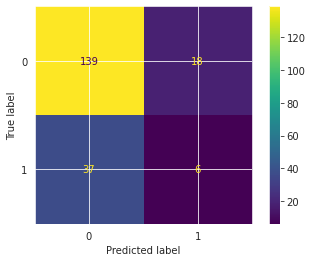

In [71]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


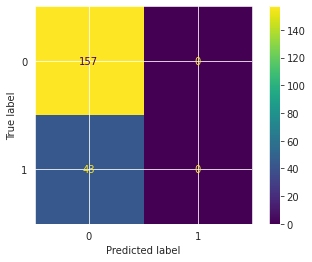

In [72]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


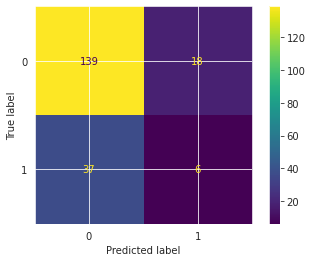

In [73]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


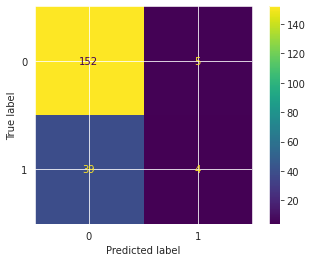

In [74]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:53:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


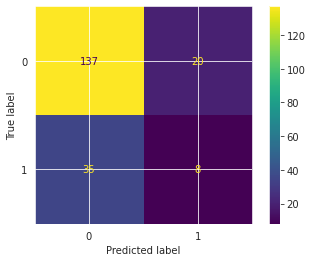

In [75]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


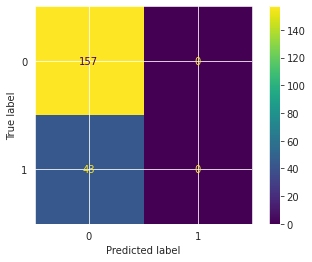

In [76]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)

In [77]:
base_model= MobileNet(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [79]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 76.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 62.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 69.5%
F1_score : 0.67
Kappa Score : -0.01 
Recall score: 0.7
Precision score : 0.66
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



------------------------ Train Set Metrics------------------------

Accuracy core : 79.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 71.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 76.0%
F1_score : 0.69
Kappa Score : -0.02 
Recall score: 0.76
Precision score : 0.64
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 75.17%
------------------------ Validation Set Metrics------------------------

Accuracy score : 71.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 76.0%
F1_score : 0.69
Kappa Score : -0.02 
Recall score: 0.76
Precision score : 0.64
--------------------------------------------------------------------------------

------------------

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



------------------------ Train Set Metrics------------------------

Accuracy core : 98.33%
------------------------ Validation Set Metrics------------------------

Accuracy score : 65.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 65.5%
F1_score : 0.65
Kappa Score : -0.07 
Recall score: 0.66
Precision score : 0.64
--------------------------------------------------------------------------------

------------------------------Fitting MLP Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--------------------------------------------------------------------------------



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 3s 30ms/step - loss: 0.5971 - accuracy: 0.7233 - val_loss: 0.5898 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5857 - accuracy: 0.7267 - val_loss: 0.5846 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5896 - accuracy: 0.7267 - val_loss: 0.5826 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5925 - accuracy: 0.7267 - val_loss: 0.5828 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5910 - accuracy: 0.7267 - val_loss: 0.5816 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5872 - accuracy: 0.7267 - val_loss: 0.5817 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5915 - accuracy: 0.7267 - val_loss: 0.5812 - val_accuracy: 0.7300
Epoch 8/10
19

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


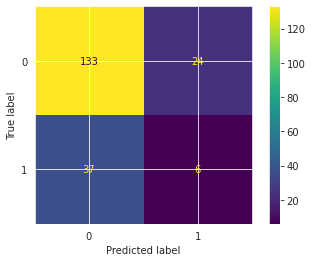

In [81]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


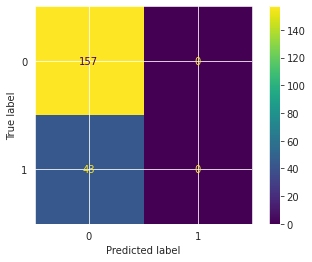

In [82]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


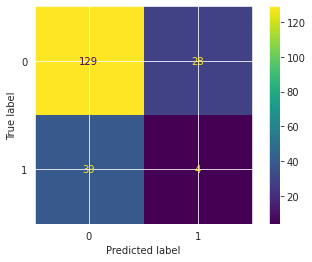

In [83]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


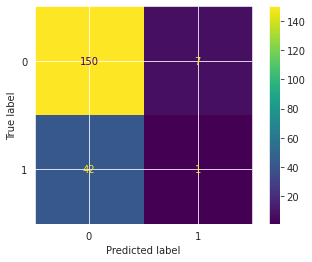

In [84]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:53:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


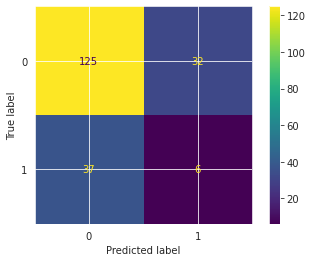

In [85]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


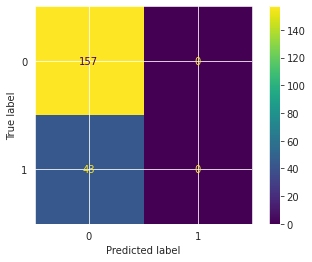

In [86]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)

In [87]:
base_model= InceptionResNetV2(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

219070464/219055592 [==============================] - 1s 0us/step


In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [89]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 77.66999999999999%
------------------------ Validation Set Metrics------------------------

Accuracy score : 70.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 70.5%
F1_score : 0.66
Kappa Score : -0.08 
Recall score: 0.7
Precision score : 0.63
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision sco

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr


------------------------ Train Set Metrics------------------------

Accuracy core : 77.5%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 77.5%
F1_score : 0.69
Kappa Score : -0.02 
Recall score: 0.78
Precision score : 0.61
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 75.83%
------------------------ Validation Set Metrics------------------------

Accuracy score : 71.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 76.0%
F1_score : 0.69
Kappa Score : -0.02 
Recall score: 0.76
Precision score : 0.64
--------------------------------------------------------------------------------

------------------

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 4s 30ms/step - loss: 0.5898 - accuracy: 0.7267 - val_loss: 0.5798 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 0s 11ms/step - loss: 0.5909 - accuracy: 0.7267 - val_loss: 0.5834 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5947 - accuracy: 0.7267 - val_loss: 0.5853 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 0.5884 - accuracy: 0.7267 - val_loss: 0.5807 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5953 - accuracy: 0.7267 - val_loss: 0.5835 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5890 - accuracy: 0.7267 - val_loss: 0.5904 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5910 - accuracy: 0.7267 - val_loss: 0.5933 - val_accuracy: 0.7300
Epoch 8/10
19

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


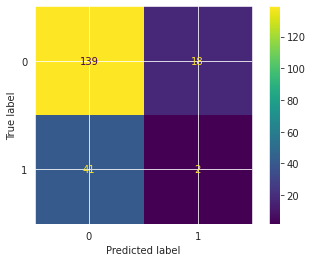

In [91]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


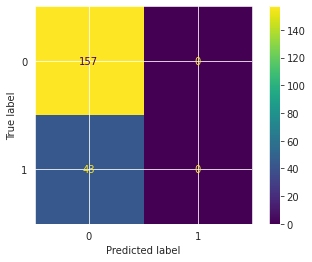

In [92]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


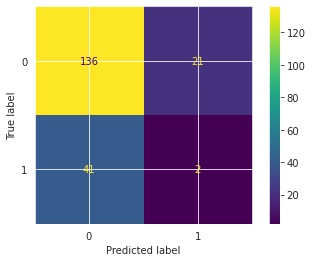

In [93]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


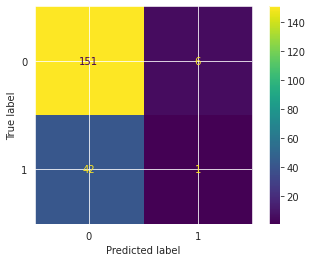

In [94]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:56:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


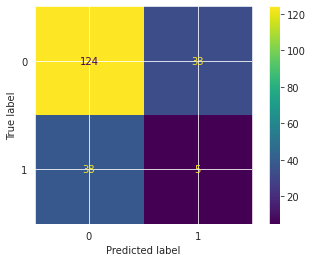

In [95]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


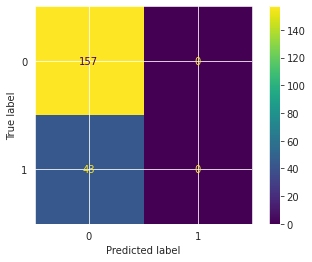

In [96]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)

In [97]:
base_model= InceptionResNetV2(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [99]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 75.83%
------------------------ Validation Set Metrics------------------------

Accuracy score : 67.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 70.0%
F1_score : 0.67
Kappa Score : -0.05 
Recall score: 0.7
Precision score : 0.64
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



------------------------ Train Set Metrics------------------------

Accuracy core : 81.17%
------------------------ Validation Set Metrics------------------------

Accuracy score : 72.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 79.0%
F1_score : 0.71
Kappa Score : 0.06 
Recall score: 0.79
Precision score : 0.76
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 76.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 71.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.0%
F1_score : 0.7
Kappa Score : 0.02 
Recall score: 0.78
Precision score : 0.69
--------------------------------------------------------------------------------

---------------------

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



------------------------ Train Set Metrics------------------------

Accuracy core : 99.5%
------------------------ Validation Set Metrics------------------------

Accuracy score : 65.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 69.0%
F1_score : 0.68
Kappa Score : 0.02 
Recall score: 0.69
Precision score : 0.67
--------------------------------------------------------------------------------

------------------------------Fitting MLP Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--------------------------------------------------------------------------------



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 3s 30ms/step - loss: 0.5865 - accuracy: 0.7267 - val_loss: 0.5915 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5871 - accuracy: 0.7267 - val_loss: 0.5906 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5854 - accuracy: 0.7267 - val_loss: 0.5846 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5883 - accuracy: 0.7267 - val_loss: 0.5850 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 0s 9ms/step - loss: 0.5855 - accuracy: 0.7267 - val_loss: 0.5835 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 0.5852 - accuracy: 0.7267 - val_loss: 0.5828 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5858 - accuracy: 0.7267 - val_loss: 0.5843 - val_accuracy: 0.7300
Epoch 8/10
19/1

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


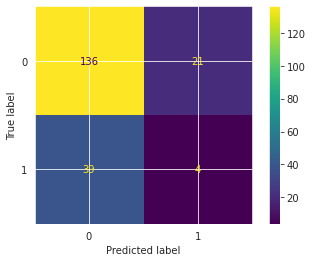

In [101]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


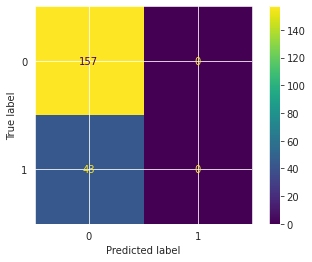

In [102]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


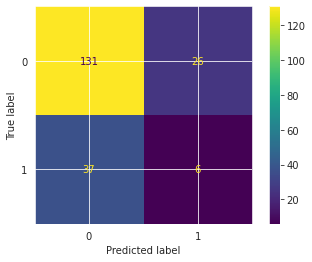

In [103]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


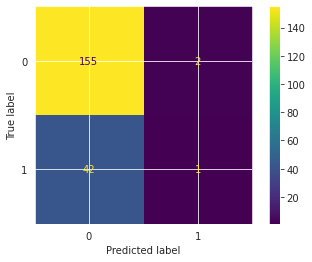

In [104]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:58:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


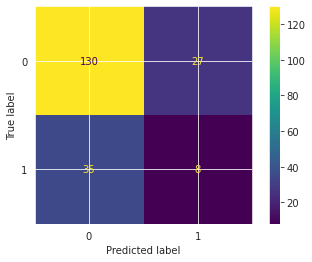

In [105]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


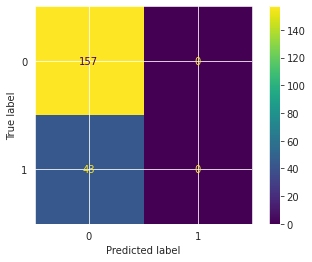

In [106]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)

In [107]:
base_model= InceptionResNetV2(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

In [108]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [109]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 75.83%
------------------------ Validation Set Metrics------------------------

Accuracy score : 66.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 63.5%
F1_score : 0.62
Kappa Score : -0.15 
Recall score: 0.64
Precision score : 0.61
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
-

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



------------------------ Train Set Metrics------------------------

Accuracy core : 79.17%
------------------------ Validation Set Metrics------------------------

Accuracy score : 72.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 75.5%
F1_score : 0.68
Kappa Score : -0.06 
Recall score: 0.76
Precision score : 0.61
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 75.83%
------------------------ Validation Set Metrics------------------------

Accuracy score : 72.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 73.0%
F1_score : 0.66
Kappa Score : -0.1 
Recall score: 0.73
Precision score : 0.61
--------------------------------------------------------------------------------

------------------

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



------------------------ Train Set Metrics------------------------

Accuracy core : 99.33%
------------------------ Validation Set Metrics------------------------

Accuracy score : 66.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 62.0%
F1_score : 0.61
Kappa Score : -0.17 
Recall score: 0.62
Precision score : 0.61
--------------------------------------------------------------------------------

------------------------------Fitting MLP Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--------------------------------------------------------------------------------



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 3s 30ms/step - loss: 0.5900 - accuracy: 0.7267 - val_loss: 0.5883 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5868 - accuracy: 0.7267 - val_loss: 0.5859 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 0.5896 - accuracy: 0.7267 - val_loss: 0.5910 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 0.5882 - accuracy: 0.7267 - val_loss: 0.5926 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 0s 11ms/step - loss: 0.5894 - accuracy: 0.7267 - val_loss: 0.5857 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5896 - accuracy: 0.7267 - val_loss: 0.5875 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.5851 - accuracy: 0.7267 - val_loss: 0.5909 - val_accuracy: 0.7300
Epoch 8/10
19

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


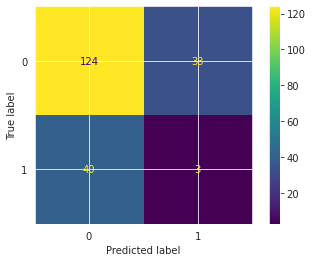

In [111]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


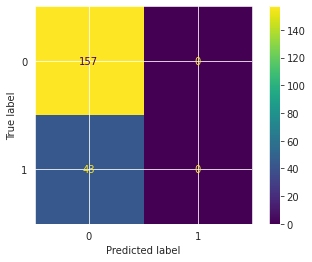

In [112]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


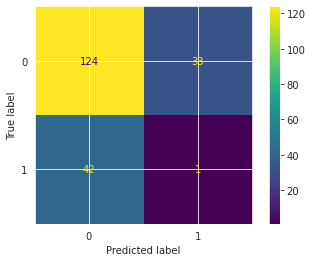

In [113]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


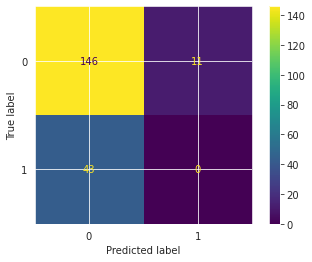

In [114]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:00:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


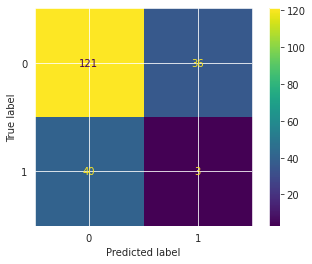

In [115]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


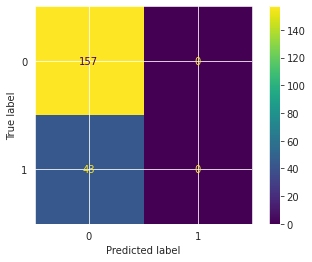

In [116]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)

In [117]:
base_model= InceptionResNetV2(input_shape=(264,264,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

In [118]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
        "MLP Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
    MLPClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [119]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 74.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 66.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 68.0%
F1_score : 0.65
Kappa Score : -0.1 
Recall score: 0.68
Precision score : 0.63
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



------------------------ Train Set Metrics------------------------

Accuracy core : 80.83%
------------------------ Validation Set Metrics------------------------

Accuracy score : 72.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 77.5%
F1_score : 0.69
Kappa Score : 0.01 
Recall score: 0.78
Precision score : 0.67
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 74.5%
------------------------ Validation Set Metrics------------------------

Accuracy score : 71.5%
------------------------ Test Set Metrics------------------------

Accuracy score : 76.5%
F1_score : 0.7
Kappa Score : 0.01 
Recall score: 0.76
Precision score : 0.67
--------------------------------------------------------------------------------

---------------------

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



------------------------ Train Set Metrics------------------------

Accuracy core : 99.17%
------------------------ Validation Set Metrics------------------------

Accuracy score : 69.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 63.0%
F1_score : 0.62
Kappa Score : -0.15 
Recall score: 0.63
Precision score : 0.61
--------------------------------------------------------------------------------

------------------------------Fitting MLP Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 72.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 73.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 78.5%
F1_score : 0.69
Kappa Score : 0.0 
Recall score: 0.78
Precision score : 0.62
--------------------------------------------------------------------------------



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))

Epoch 1/10
19/19 [==============================] - 3s 31ms/step - loss: 0.5893 - accuracy: 0.7267 - val_loss: 0.5881 - val_accuracy: 0.7300
Epoch 2/10
19/19 [==============================] - 0s 11ms/step - loss: 0.5841 - accuracy: 0.7267 - val_loss: 0.5919 - val_accuracy: 0.7300
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 0.5870 - accuracy: 0.7267 - val_loss: 0.5897 - val_accuracy: 0.7300
Epoch 4/10
19/19 [==============================] - 0s 13ms/step - loss: 0.5873 - accuracy: 0.7267 - val_loss: 0.5851 - val_accuracy: 0.7300
Epoch 5/10
19/19 [==============================] - 0s 18ms/step - loss: 0.5874 - accuracy: 0.7267 - val_loss: 0.5836 - val_accuracy: 0.7300
Epoch 6/10
19/19 [==============================] - 0s 17ms/step - loss: 0.5902 - accuracy: 0.7267 - val_loss: 0.5841 - val_accuracy: 0.7300
Epoch 7/10
19/19 [==============================] - 0s 11ms/step - loss: 0.5879 - accuracy: 0.7267 - val_loss: 0.5864 - val_accuracy: 0.7300
Epoch 8/10
19

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


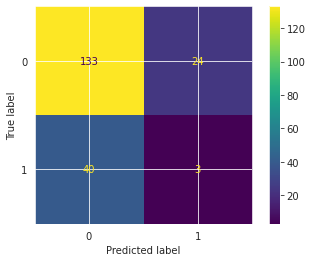

In [121]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30)
knn.fit(train_features, y_train)
plot_confusion_matrix(knn, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


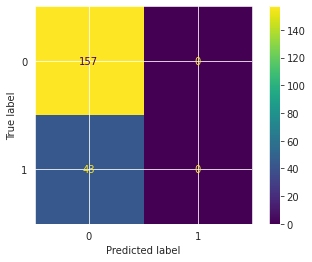

In [122]:
svc = SVC()
svc.fit(train_features, y_train)
plot_confusion_matrix(svc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


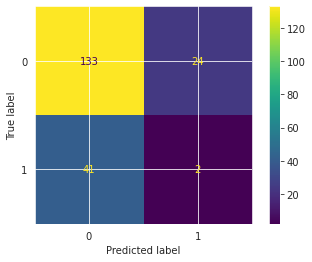

In [123]:
rf = RandomForestClassifier()
rf.fit(train_features, y_train)
plot_confusion_matrix(rf, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


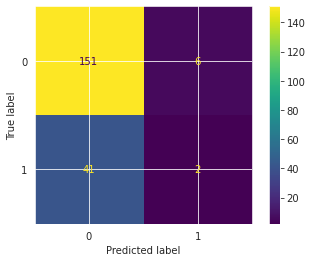

In [124]:
ada = AdaBoostClassifier()
ada.fit(train_features, y_train)
plot_confusion_matrix(ada, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


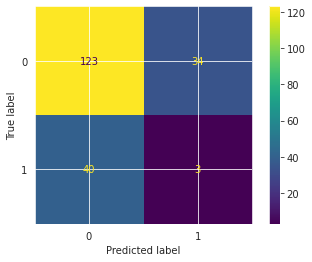

In [125]:
xgbc = XGBClassifier()
xgbc.fit(train_features, y_train)
plot_confusion_matrix(xgbc, test_features, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


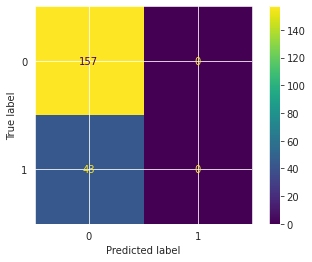

In [126]:
mlpc = MLPClassifier()
mlpc.fit(train_features, y_train)
plot_confusion_matrix(mlpc, test_features, y_test)